# Python e PBI - Análise Gráfica e Fundamentalista de Ativos


---



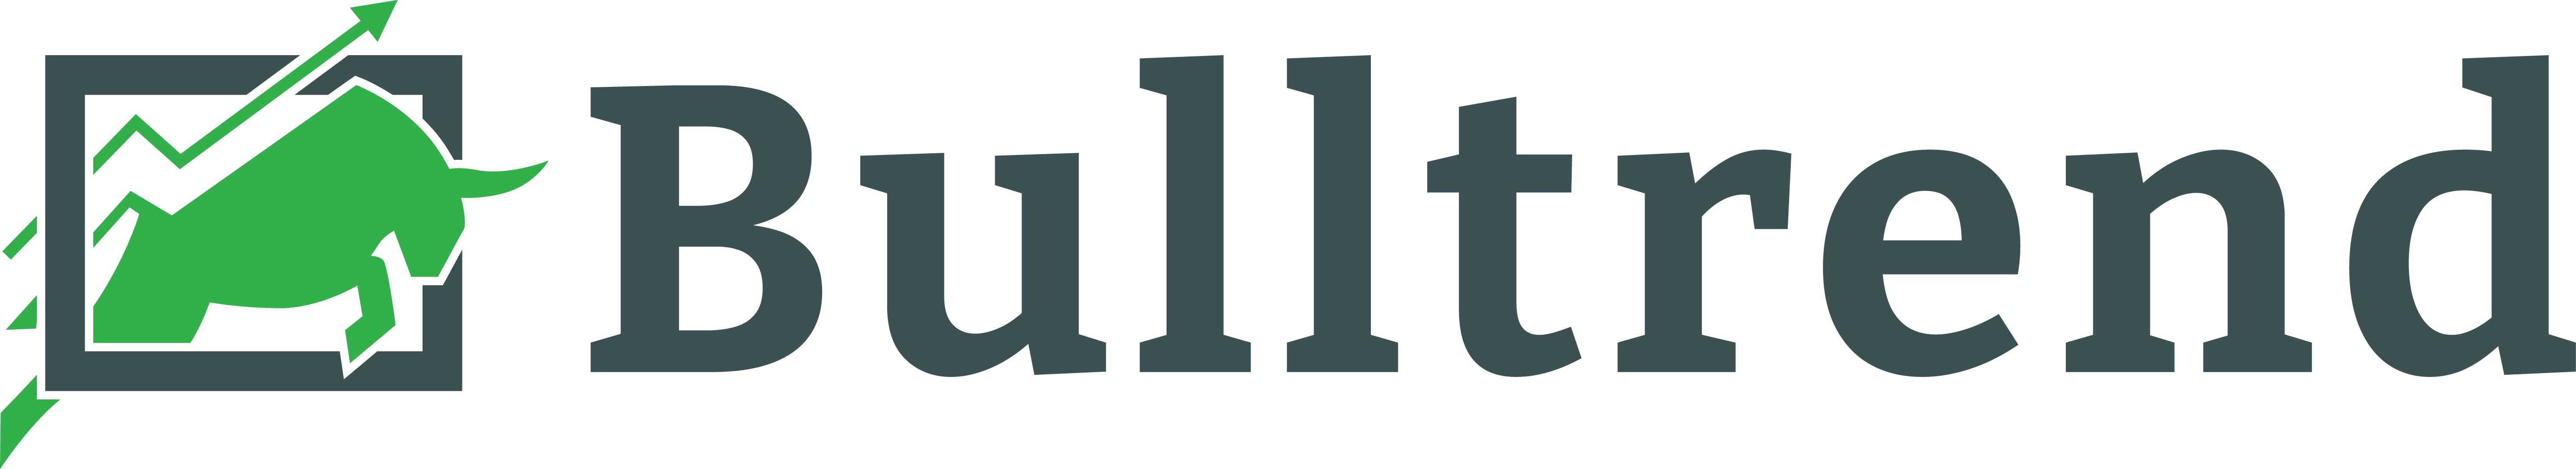

A consultoria financeira **Bulltrend** busca visualizar as carteiras de investimento de seus(suas) clientes pensando na melhor forma de indicar bons ativos e acompanhar a evolução destes.

Você, como analista de dados dessa consultoria, decidiu combinar duas potentes ferramentas de Data Science, Python e Power BI, para auxiliar o time de consultores a acompanhar de perto a carteira de ativos dos(das) clientes.

Aqui vamos trazer duas importantes correntes para análise de ativos: a análise fundamentalista e a análise gráfica.

Por meio da coleta dos dados com as bibliotecas Python e carga no Power BI, será possível avaliar a carteira da pessoa cliente e acompanhar os indicadores fundamentalistas que avaliam a situação financeira da empresas listadas na bolsa e as flutuações das cotações no período estipulado

**Problema de negócio:**

O objetivo da **Bulltrend** é identificar quais são os melhores indicadores para gerar o dashboard e compilar em um só painel esses dados juntos às cotações de cada ativo.

**Base de dados**

Vamos importar duas bases de dados em que:
- A base de dados com as cotações será gerada dentro do periodo de 01/08/2022 à 01/08/2023, por meio da biblioteca [yfinance](https://github.com/ranaroussi/yfinance) que lê os dados das cotações de todos os ativos listadas na bolsa do Brasil e do Mundo por meio do site da [Yahoo Finance](https://br.financas.yahoo.com/quote/%5EBVSP?p=%5EBVSP)
- A base de dados com os indicadores será gerado, por meio da biblioteca [fundamentus](https://github.com/mv/fundamentus-api) que lê os dados dos indicadores fundamentalistas de todos os ativos listadas na bolsa do Brasil por meio do site da [FUNDAMENTUS](https://www.fundamentus.com.br/).


**Desafio**

Você como analista de dados do time de dados da Bulltrend tem o desafio de extrair os dados fundamentalistas e de cotações dos ativos de uma carteira hipotética por meio das bbliotecas Python e carregá-los dentro do Power BI a fim de construir um dashboard com os dados compilados e disponíveis para a análise da pessoa consultora.


## Instalando as bibliotecas no ambiente do Colab

In [ ]:
!pip install fundamentus yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.9 MB/s eta 0:00:00


## Dados de cotações da carteira hipotética

In [ ]:
# Importando a biblioteca
import yfinance as yf

In [ ]:
# Definindo a carteira de ações
carteira_yf = ['ABEV3.SA', 'B3SA3.SA', 'ELET3.SA', 'GGBR4.SA', 'ITSA4.SA',
               'PETR4.SA', 'RENT3.SA', 'SUZB3.SA', 'VALE3.SA', 'WEGE3.SA']

In [ ]:
# Carregando os dados da carteira
df = yf.download(carteira_yf, start="2022-08-01", end="2023-08-01")

[*********************100%%**********************]  10 of 10 completed


In [ ]:
df.head(3)

Adj Close                                                        \
             ABEV3.SA   B3SA3.SA   ELET3.SA   GGBR4.SA  ITSA4.SA   PETR4.SA   
Date                                                                          
2022-08-01  13.897732  10.545437  46.199085  19.448982  7.204308  19.308052   
2022-08-02  13.973727  10.477528  46.556755  20.048803  7.271795  19.394045   
2022-08-03  13.897732  10.826777  46.705784  19.235350  7.330847  19.405508   

                                                        ...    Volume  \
             RENT3.SA   SUZB3.SA   VALE3.SA   WEGE3.SA  ...  ABEV3.SA   
Date                                                    ...             
2022-08-01  55.758350  45.813416  61.271076  27.456799  ...  34565900   
2022-08-02  56.021736  46.189804  63.224045  27.949211  ...  12515800   
2022-08-03  57.767841  45.678299  60.767082  27.693161  ...  19576600   

                                                                       \
            B3SA3.SA  ELET3.SA  GGBR4.SA  ITSA4.SA  PETR4.SA RENT3.SA   
Date                                                                    
2022-08-01  26237600  12239200  13879215  23302400  81365100  6737700   
2022-08-02  29130100   7477600  13398945  14225860  69147100  4847800   
2022-08-03  29172900   8281500  25537890  22885280  65544500  4904200   

                                        
           SUZB3.SA  VALE3.SA WEGE3.SA  
Date                                    
2022-08-01  7127600  38874000  8202200  
2022-08-02  4379000  32636900  7214800  
2022-08-03  4451900  31934600  6627100  

[3 rows x 60 columns]

In [ ]:
# Passando os ativos para o multindex do df
cotacoes = df.stack(level = 1)
cotacoes

Adj Close      Close       High        Low       Open  \
Date                                                                         
2022-08-01 ABEV3.SA  13.897732  14.630000  14.890000  14.430000  14.860000   
           B3SA3.SA  10.545437  10.870000  11.120000  10.710000  11.020000   
           ELET3.SA  46.199085  46.500000  46.889999  45.660000  45.799999   
           GGBR4.SA  19.448982  22.542856  23.457142  22.380953  23.457142   
           ITSA4.SA   7.204308   7.763636   7.890909   7.681818   7.863636   
...                        ...        ...        ...        ...        ...   
2023-07-31 PETR4.SA  29.967674  31.110001  31.150000  30.299999  30.299999   
           RENT3.SA  67.220001  67.220001  67.660004  66.440002  67.040001   
           SUZB3.SA  48.070000  48.070000  48.610001  47.340000  47.389999   
           VALE3.SA  67.134636  69.160004  69.680000  67.839996  68.000000   
           WEGE3.SA  39.919998  39.919998  40.290001  39.810001  40.290001   

                       Volume  
Date                           
2022-08-01 ABEV3.SA  34565900  
           B3SA3.SA  26237600  
           ELET3.SA  12239200  
           GGBR4.SA  13879215  
           ITSA4.SA  23302400  
...                       ...  
2023-07-31 PETR4.SA  91290800  
           RENT3.SA   5966900  
           SUZB3.SA   4602700  
           VALE3.SA  26065700  
           WEGE3.SA   7141800  

[2500 rows x 6 columns]

In [ ]:
# Resetando os índices e renomenado a coluna dos ativos
cotacoes = cotacoes.reset_index().rename(columns={"level_1": "Ativo"})

# Organizando o df
cotacoes = cotacoes[["Date", "Open", "High", "Low", "Close", "Ativo"]]
cotacoes.head(10)

,Date,Open,High,Low,Close,Ativo
0,2022-08-01,14.860000,14.890000,14.430000,14.630000,ABEV3.SA
1,2022-08-01,11.020000,11.120000,10.710000,10.870000,B3SA3.SA
2,2022-08-01,45.799999,46.889999,45.660000,46.500000,ELET3.SA
3,2022-08-01,23.457142,23.457142,22.380953,22.542856,GGBR4.SA
4,2022-08-01,7.863636,7.890909,7.681818,7.763636,ITSA4.SA
5,2022-08-01,34.000000,34.150002,33.220001,33.680000,PETR4.SA
6,2022-08-01,57.400002,57.880001,56.799999,57.160000,RENT3.SA
7,2022-08-01,48.360001,48.360001,46.950001,47.470001,SUZB3.SA
8,2022-08-01,68.940002,69.849998,67.930000,68.080002,VALE3.SA
9,2022-08-01,28.040001,28.680000,27.770000,27.879999,WEGE3.SA


In [ ]:
cotacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2500 non-null   datetime64[ns]
 1   Open    2500 non-null   float64       
 2   High    2500 non-null   float64       
 3   Low     2500 non-null   float64       
 4   Close   2500 non-null   float64       
 5   Ativo   2500 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 117.3+ KB


### Código completo das cotações da carteira

In [ ]:
# Código completo da obtenção dos dados históricos das cotações da carteira de 01/08/2022 à 01/08/2023
# Importando a biblioteca
import yfinance as yf

# Definindo a carteira de ações
carteira_yf = ['ABEV3.SA', 'B3SA3.SA', 'ELET3.SA', 'GGBR4.SA', 'ITSA4.SA',
               'PETR4.SA', 'RENT3.SA', 'SUZB3.SA', 'VALE3.SA', 'WEGE3.SA']

# Carregando os dados da carteira
df = yf.download(carteira_yf, start="2022-08-01", end="2023-08-01")

# Passando os ativos para o multindex do df
cotacoes = df.stack(level=1)

# Resetando os índices e renomenado a coluna dos ativos
cotacoes = cotacoes.reset_index().rename(columns={'level_1': 'Ativo'})

# Organizando o df
cotacoes = cotacoes[["Date", "Open", "High", "Low", "Close", "Ativo"]]

del carteira_yf, df

## Dados dos indicadores da carteira hipotética

In [ ]:
# Importando as bibliotecas
import fundamentus
import pandas as pd

In [ ]:
# Lendo um papel específico
weg = fundamentus.get_papel("WEGE3")
weg

,Papel,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,Vol_med_2m,...,Ativo_Circulante,Div_Bruta,Div_Liquida,Patrim_Liq,Receita_Liquida_12m,EBIT_12m,Lucro_Liquido_12m,Receita_Liquida_3m,EBIT_3m,Lucro_Liquido_3m
WEGE3,WEGE3,ON N1,WEG SA ON N1,Máquinas e Equipamentos,"Motores, Compressores e Outros",35.79,2023-09-18,29.66,41.65,325272000,...,20237000000,2782720000,-2697740000,15385000000,31758300000,6830110000,5026270000,8171320000,1900990000,1368400000


In [ ]:
# Definindo a carteira de ações
carteira_fund = ["ABEV3", "B3SA3", "ELET3", "GGBR4", "ITSA4",
                 "PETR4", "RENT3", "SUZB3", "VALE3", "WEGE3"]

In [ ]:
# Criando um df com algumas infos da carteira
ind = fundamentus.get_papel(carteira_fund)[['Setor', 'Cotacao', 'Min_52_sem', 'Max_52_sem', 'Valor_de_mercado',
                                            'Nro_Acoes', 'Patrim_Liq','Receita_Liquida_12m','Receita_Liquida_3m',
                                            'Lucro_Liquido_12m', 'Lucro_Liquido_3m']]
ind.head(3)

/usr/local/lib/python3.10/dist-packages/fundamentus/detalhes.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(df)
/usr/local/lib/python3.10/dist-packages/fundamentus/detalhes.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(df)
/usr/local/lib/python3.10/dist-packages/fundamentus/detalhes.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(df)
/usr/local/lib/python3.10/dist-packages/fundamentus/detalhes.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(df)
/usr/local/lib/python3.10/dist-packages/fundamentus/detalhes.py:64: FutureWarnin

,Setor,Cotacao,Min_52_sem,Max_52_sem,Valor_de_mercado,Nro_Acoes,Patrim_Liq,Receita_Liquida_12m,Receita_Liquida_3m,Lucro_Liquido_12m,Lucro_Liquido_3m
ABEV3,Bebidas,13.39,12.86,16.03,210944000000,15753800000,85074600000,82710500000,18898100000,14278000000,2502970000
B3SA3,Serviços Financeiros Diversos,13.08,10.26,15.26,76112500000,5819000000,20540800000,10522000000,2477120000,4175070000,1052790000
ELET3,Energia Elétrica,35.60,30.33,51.23,82132800000,2307100000,111402000000,34492200000,9245530000,1703340000,1685230000


In [ ]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, ABEV3 to WEGE3
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Setor                10 non-null     object
 1   Cotacao              10 non-null     object
 2   Min_52_sem           10 non-null     object
 3   Max_52_sem           10 non-null     object
 4   Valor_de_mercado     10 non-null     int64 
 5   Nro_Acoes            10 non-null     object
 6   Patrim_Liq           10 non-null     object
 7   Receita_Liquida_12m  10 non-null     object
 8   Receita_Liquida_3m   10 non-null     object
 9   Lucro_Liquido_12m    10 non-null     object
 10  Lucro_Liquido_3m     10 non-null     object
dtypes: int64(1), object(10)
memory usage: 960.0+ bytes


In [ ]:
# Passando o ticker para uma coluna
ind = ind.reset_index()
ind.rename(columns={"index":"Ativo"}, inplace=True)

# Alterando colunas object para numeric
colunas = ['Cotacao', 'Min_52_sem', 'Max_52_sem', 'Valor_de_mercado', 'Nro_Acoes', 'Patrim_Liq',
           'Receita_Liquida_12m', 'Receita_Liquida_3m', 'Lucro_Liquido_12m', 'Lucro_Liquido_3m']
ind[colunas] = ind[colunas].apply(pd.to_numeric, errors='coerce', axis=1)
ind.head()

,Ativo,Setor,Cotacao,Min_52_sem,Max_52_sem,Valor_de_mercado,Nro_Acoes,Patrim_Liq,Receita_Liquida_12m,Receita_Liquida_3m,Lucro_Liquido_12m,Lucro_Liquido_3m
0,ABEV3,Bebidas,13.39,12.86,16.03,2.109440e+11,1.575380e+10,8.507460e+10,8.271050e+10,1.889810e+10,1.427800e+10,2.502970e+09
1,B3SA3,Serviços Financeiros Diversos,13.08,10.26,15.26,7.611250e+10,5.819000e+09,2.054080e+10,1.052200e+10,2.477120e+09,4.175070e+09,1.052790e+09
2,ELET3,Energia Elétrica,35.60,30.33,51.23,8.213280e+10,2.307100e+09,1.114020e+11,3.449220e+10,9.245530e+09,1.703340e+09,1.685230e+09
3,GGBR4,Siderurgia e Metalurgia,24.94,19.68,30.58,4.382130e+10,1.757070e+09,4.897690e+10,7.625090e+10,1.826540e+10,9.560300e+09,2.135910e+09
4,ITSA4,Intermediários Financeiros,9.35,7.54,9.79,9.070820e+10,9.701410e+09,7.686700e+10,7.807000e+09,1.954000e+09,1.327000e+10,3.593000e+09


In [ ]:
# Criando um novo df com alguns indicadores da carteira
ind_2 = fundamentus.get_resultado_raw().reset_index()
ind_2 = ind_2.query("papel in @carteira_fund")

ind_2 = ind_2[['papel','P/L', 'Div.Yield','P/VP','ROE']].reset_index(drop=True)

ind_2.rename(columns={'papel': 'Ativo','Div.Yield':'DY'}, inplace= True)
ind_2.head()

Multiples,Ativo,P/L,DY,P/VP,ROE
0,ABEV3,14.77,0.0569,2.48,0.1678
1,B3SA3,18.23,0.0307,3.71,0.2033
2,ELET3,48.22,0.0062,0.74,0.0153
3,GGBR4,4.58,0.1297,0.89,0.1952
4,ITSA4,6.84,0.0614,1.18,0.1726


In [ ]:
# Concatenando os dfs em um só com as infos e indicadores
indicadores = pd.merge(ind, ind_2, on="Ativo")

# Criando uma coluna para LPA (Lucro por Ação) e VPA (Valor Patrimonial por ação)
# para calcular a fórmula de Graham  Valor intrínseco de uma ação (VI = √22,5 x LPA x VPA)
indicadores["LPA"] = (indicadores["Lucro_Liquido_12m"] / indicadores["Nro_Acoes"]).round(2)
indicadores["VPA"] = (indicadores["Patrim_Liq"] / indicadores["Nro_Acoes"]).round(2)
indicadores

,Ativo,Setor,Cotacao,Min_52_sem,Max_52_sem,Valor_de_mercado,Nro_Acoes,Patrim_Liq,Receita_Liquida_12m,Receita_Liquida_3m,Lucro_Liquido_12m,Lucro_Liquido_3m,P/L,DY,P/VP,ROE,LPA,VPA
0,ABEV3,Bebidas,13.39,12.86,16.03,2.109440e+11,1.575380e+10,8.507460e+10,8.271050e+10,1.889810e+10,1.427800e+10,2.502970e+09,14.77,0.0569,2.48,0.1678,0.91,5.40
1,B3SA3,Serviços Financeiros Diversos,13.08,10.26,15.26,7.611250e+10,5.819000e+09,2.054080e+10,1.052200e+10,2.477120e+09,4.175070e+09,1.052790e+09,18.23,0.0307,3.71,0.2033,0.72,3.53
2,ELET3,Energia Elétrica,35.60,30.33,51.23,8.213280e+10,2.307100e+09,1.114020e+11,3.449220e+10,9.245530e+09,1.703340e+09,1.685230e+09,48.22,0.0062,0.74,0.0153,0.74,48.29
3,GGBR4,Siderurgia e Metalurgia,24.94,19.68,30.58,4.382130e+10,1.757070e+09,4.897690e+10,7.625090e+10,1.826540e+10,9.560300e+09,2.135910e+09,4.58,0.1297,0.89,0.1952,5.44,27.87
4,ITSA4,Intermediários Financeiros,9.35,7.54,9.79,9.070820e+10,9.701410e+09,7.686700e+10,7.807000e+09,1.954000e+09,1.327000e+10,3.593000e+09,6.84,0.0614,1.18,0.1726,1.37,7.92
5,PETR4,"Petróleo, Gás e Biocombustíveis",34.13,17.40,34.13,4.452090e+11,1.304450e+10,3.706830e+11,5.815630e+11,1.138400e+11,1.563750e+11,2.878200e+10,2.85,0.2711,1.20,0.4219,11.99,28.42
6,RENT3,Diversos,59.96,48.59,72.26,6.357920e+10,1.060360e+09,2.488020e+10,2.569430e+10,6.846160e+09,1.304290e+09,-8.806900e+07,48.75,0.0227,2.56,0.0524,1.23,23.46
7,SUZB3,Madeira e Papel,52.05,38.00,56.55,6.892030e+10,1.324120e+09,4.258750e+10,4.900450e+10,9.159630e+09,2.321180e+10,5.073130e+09,2.97,0.0354,1.62,0.5450,17.53,32.16
8,VALE3,Mineração,68.72,61.05,93.50,3.119210e+11,4.539010e+09,1.869880e+11,2.064140e+11,4.775800e+10,5.693900e+10,4.573000e+09,5.48,0.0590,1.67,0.3045,12.54,41.20
9,WEGE3,Máquinas e Equipamentos,35.79,29.66,41.65,1.502220e+11,4.197320e+09,1.538500e+10,3.175830e+10,8.171320e+09,5.026270e+09,1.368400e+09,29.89,0.0162,9.76,0.3267,1.20,3.67


### Código completo dos indicadores

In [ ]:
# Importando as bibliotecas
import fundamentus
import pandas as pd

# Definindo a carteira de ações
carteira_fund = ["ABEV3", "B3SA3", "ELET3", "GGBR4", "ITSA4",
                 "PETR4", "RENT3", "SUZB3", "VALE3", "WEGE3"]

# Criando um df com algumas infos da carteira
ind = fundamentus.get_papel(carteira_fund)[['Setor', 'Cotacao', 'Min_52_sem', 'Max_52_sem', 'Valor_de_mercado',
                                            'Nro_Acoes', 'Patrim_Liq','Receita_Liquida_12m','Receita_Liquida_3m',
                                            'Lucro_Liquido_12m', 'Lucro_Liquido_3m']]
# Passando o ticker para uma coluna
ind = ind.reset_index()
ind.rename(columns = {'index':'Ativo'}, inplace=True)

# Alterando colunas object para numeric
colunas = ['Cotacao', 'Min_52_sem', 'Max_52_sem', 'Valor_de_mercado', 'Nro_Acoes', 'Patrim_Liq',
           'Receita_Liquida_12m', 'Receita_Liquida_3m', 'Lucro_Liquido_12m', 'Lucro_Liquido_3m']
ind[colunas] = ind[colunas].apply(pd.to_numeric, errors='coerce', axis=1)

# Criando um novo df com alguns indicadores da carteira
ind_2 = fundamentus.get_resultado_raw().reset_index()
ind_2 = ind_2.query("papel in @carteira_fund")
ind_2 = ind_2[['papel','P/L', 'Div.Yield','P/VP','ROE']].reset_index(drop=True)
ind_2.rename(columns={'papel': 'Ativo','Div.Yield':'DY'}, inplace= True)

# Concatenando os dfs em um só com as infos e indicadores
indicadores = pd.merge(ind, ind_2, on="Ativo")

# Criando uma coluna para LPA (Lucro por Ação) e VPA (Valor Patrimonial por ação)
# para calcular a fórmula de Graham  Valor intrínseco de uma ação (VI = √22,5 x LPA x VPA)
indicadores["LPA"] = (indicadores["Lucro_Liquido_12m"] / indicadores ["Nro_Acoes"]).round(2)
indicadores["VPA"] = (indicadores["Patrim_Liq"] / indicadores ["Nro_Acoes"]).round(2)

del ind, ind_2, carteira_fund, colunas

/usr/local/lib/python3.10/dist-packages/fundamentus/detalhes.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(df)
/usr/local/lib/python3.10/dist-packages/fundamentus/detalhes.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(df)
/usr/local/lib/python3.10/dist-packages/fundamentus/detalhes.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(df)
/usr/local/lib/python3.10/dist-packages/fundamentus/detalhes.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(df)
/usr/local/lib/python3.10/dist-packages/fundamentus/detalhes.py:64: FutureWarnin